# 1. Import Libraries

In [1]:
# import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os

import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

sns.set_theme(style="white", palette=None)

In [2]:
def df_check(df):
    print(f'shape: {df.shape}')
    l=[]
    columns=df.columns
    for col in columns:
        dtypes = df[col].dtypes
        n_count = df[col].count()
        nunique = df[col].nunique()
        sum_null = df[col].isnull().sum()
        l.append([col,dtypes,n_count,nunique,sum_null])
        
    df_check=pd.DataFrame(l,columns=['column','dtypes','count','nunique','sum_null'])
    df_check['null_ratio'] = (df_check['sum_null'] / df.shape[0]*100).round(1)

    return df_check

# 2. Load Datasets

In [3]:
## Since we have multiple csv files,firstly get their names 

all_file_names = os.listdir()
train_csv_names = []
test_csv_names = []

for f in all_file_names:
    if '.csv' in f:
        if f in ['2019_07.csv','2019_08.csv']:
            test_csv_names.append(f)
        else:
            train_csv_names.append(f)

print(f'Train CSV File Names:\n{train_csv_names}\n')
print(f'Test CSV File Names:\n{test_csv_names}\n')

Train CSV File Names:
['2018_07.csv', '2018_08.csv', '2018_09.csv', '2018_10.csv', '2018_11.csv', '2018_12.csv', '2019_01.csv', '2019_02.csv', '2019_03.csv', '2019_04.csv', '2019_05.csv', '2019_06.csv']

Test CSV File Names:
['2019_07.csv', '2019_08.csv']



In [4]:
def combine_csv(csv_files):
    all_df_data = []

    for csv_file in csv_files:
        temp_df = pd.read_csv(csv_file, index_col=None, header=0)
        print(f"{csv_file} has read\tits shape: {temp_df.shape}\tmin_date: {temp_df['FL_DATE'].min()}, max_date: {temp_df['FL_DATE'].max()}")
        all_df_data.append(temp_df)

    df = pd.concat(all_df_data, axis=0, ignore_index=True)
    return df

## 2.1 Load `Train` Data

In [5]:
df_train = combine_csv(train_csv_names)

2018_07.csv has read	its shape: (645299, 23)	min_date: 2018-07-01, max_date: 2018-07-31
2018_08.csv has read	its shape: (644673, 23)	min_date: 2018-08-01, max_date: 2018-08-31
2018_09.csv has read	its shape: (585749, 23)	min_date: 2018-09-01, max_date: 2018-09-30
2018_10.csv has read	its shape: (616101, 23)	min_date: 2018-10-01, max_date: 2018-10-31
2018_11.csv has read	its shape: (586178, 23)	min_date: 2018-11-01, max_date: 2018-11-30
2018_12.csv has read	its shape: (593842, 23)	min_date: 2018-12-01, max_date: 2018-12-31
2019_01.csv has read	its shape: (583985, 23)	min_date: 2019-01-01, max_date: 2019-01-31
2019_02.csv has read	its shape: (533175, 23)	min_date: 2019-02-01, max_date: 2019-02-28
2019_03.csv has read	its shape: (632074, 23)	min_date: 2019-03-01, max_date: 2019-03-31
2019_04.csv has read	its shape: (612023, 23)	min_date: 2019-04-01, max_date: 2019-04-30
2019_05.csv has read	its shape: (636390, 23)	min_date: 2019-05-01, max_date: 2019-05-31
2019_06.csv has read	its shape: 

### 2.1.1. Quick Check the `Train` Datasets

In [6]:
# Quick Check for the Train dataframe
df_check(df_train)

shape: (7306180, 23)


,column,dtypes,count,nunique,sum_null,null_ratio
0,FL_DATE,object,7306180,365,0,0.0
1,OP_UNIQUE_CARRIER,object,7306180,17,0,0.0
2,OP_CARRIER_FL_NUM,int64,7306180,7147,0,0.0
3,ORIGIN,object,7306180,359,0,0.0
4,DEST,object,7306180,359,0,0.0
5,CRS_DEP_TIME,int64,7306180,1362,0,0.0
6,DEP_TIME,float64,7176554,1440,129626,1.8
7,DEP_DELAY,float64,7175251,1541,130929,1.8
8,CRS_ARR_TIME,int64,7306180,1429,0,0.0
9,ARR_TIME,float64,7169046,1440,137134,1.9


In [7]:
df_train.head(3)

,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 22
0,2018-07-01,YV,6007,IAH,BTR,1945,1939.0,-6.0,2049,2043.0,...,64.0,64.0,44.0,253.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-07-01,YV,6012,ATL,IAD,1951,1944.0,-7.0,2146,2125.0,...,115.0,101.0,81.0,534.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-07-01,YV,6012,IAD,ATL,1705,1705.0,0.0,1915,1901.0,...,130.0,116.0,82.0,534.0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_train.tail(3)

,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 22
7306177,2019-06-30,G4,358,LAX,OKC,630,624.0,-6.0,1120,1114.0,...,170.0,170.0,149.0,1187.0,NaN,NaN,NaN,NaN,NaN,NaN
7306178,2019-06-30,G4,1411,AUS,PIT,1940,1936.0,-4.0,2331,2328.0,...,171.0,172.0,153.0,1210.0,NaN,NaN,NaN,NaN,NaN,NaN
7306179,2019-06-30,G4,1376,SAV,CVG,1832,1839.0,7.0,2009,2019.0,...,97.0,100.0,70.0,515.0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# drop the unnecessary and completely empty column called 'Unnamed: 22'
df_train.drop(columns=['Unnamed: 22'],inplace=True)
df_train.shape

(7306180, 22)

In [10]:
# Check is there any duplicate rows
df_train.duplicated().sum()

0

There aren't any duplicated rows.

In [11]:
#Change the FL_DATE object type to datetime64
df_train = df_train.astype({'FL_DATE' : 'datetime64[ns]'
                           })

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7306180 entries, 0 to 7306179
Data columns (total 22 columns):
 #   Column               Dtype         
---  ------               -----         
 0   FL_DATE              datetime64[ns]
 1   OP_UNIQUE_CARRIER    object        
 2   OP_CARRIER_FL_NUM    int64         
 3   ORIGIN               object        
 4   DEST                 object        
 5   CRS_DEP_TIME         int64         
 6   DEP_TIME             float64       
 7   DEP_DELAY            float64       
 8   CRS_ARR_TIME         int64         
 9   ARR_TIME             float64       
 10  ARR_DELAY            float64       
 11  CANCELLED            float64       
 12  CANCELLATION_CODE    object        
 13  CRS_ELAPSED_TIME     float64       
 14  ACTUAL_ELAPSED_TIME  float64       
 15  AIR_TIME             float64       
 16  DISTANCE             float64       
 17  CARRIER_DELAY        float64       
 18  WEATHER_DELAY        float64       
 19  NAS_DELAY            

In [13]:
# Let's Store original datasets before going further
df_train_org = df_train.copy()

## 2.2 Load `Test` Data

In [14]:
df_test = combine_csv(test_csv_names)

2019_07.csv has read	its shape: (659029, 23)	min_date: 2019-07-01, max_date: 2019-07-31
2019_08.csv has read	its shape: (658461, 23)	min_date: 2019-08-01, max_date: 2019-08-31


### 2.2.1. Quick Check the `Test` Datasets

In [15]:
# Quick Check for the test dataframe
df_check(df_test)

shape: (1317490, 23)


,column,dtypes,count,nunique,sum_null,null_ratio
0,FL_DATE,object,1317490,62,0,0.0
1,OP_UNIQUE_CARRIER,object,1317490,17,0,0.0
2,OP_CARRIER_FL_NUM,int64,1317490,6556,0,0.0
3,ORIGIN,object,1317490,356,0,0.0
4,DEST,object,1317490,356,0,0.0
5,CRS_DEP_TIME,int64,1317490,1233,0,0.0
6,DEP_TIME,float64,1294597,1439,22893,1.7
7,DEP_DELAY,float64,1294594,1277,22896,1.7
8,CRS_ARR_TIME,int64,1317490,1322,0,0.0
9,ARR_TIME,float64,1292940,1440,24550,1.9


In [16]:
df_test.head(3)

,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 22
0,2019-07-01,NK,227,BOS,MCO,820,813.0,-7.0,1137,1115.0,...,197.0,182.0,144.0,1121.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-07-01,NK,230,FLL,ATL,2237,2235.0,-2.0,32,17.0,...,115.0,102.0,79.0,581.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-07-01,NK,231,ATL,FLL,600,558.0,-2.0,756,747.0,...,116.0,109.0,89.0,581.0,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df_test.tail(3)

,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 22
1317487,2019-08-31,OO,3132,PHX,ABQ,1920,1915.0,-5.0,2138,2127.0,...,78.0,72.0,54.0,328.0,NaN,NaN,NaN,NaN,NaN,NaN
1317488,2019-08-31,OO,3133,ABQ,PHX,625,617.0,-8.0,644,637.0,...,79.0,80.0,55.0,328.0,NaN,NaN,NaN,NaN,NaN,NaN
1317489,2019-08-31,OO,3134,MKE,ORD,800,755.0,-5.0,901,850.0,...,61.0,55.0,26.0,67.0,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# drop the unnecessary and completely empty column called 'Unnamed: 22'
df_test.drop(columns=['Unnamed: 22'],inplace=True)
df_test.shape

(1317490, 22)

In [19]:
# Check is there any duplicate rows
df_test.duplicated().sum()

0

There aren't any duplicated rows.

In [20]:
#Change the FL_DATE object type to datetime64
df_test = df_test.astype({'FL_DATE' : 'datetime64[ns]'})

In [21]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1317490 entries, 0 to 1317489
Data columns (total 22 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   FL_DATE              1317490 non-null  datetime64[ns]
 1   OP_UNIQUE_CARRIER    1317490 non-null  object        
 2   OP_CARRIER_FL_NUM    1317490 non-null  int64         
 3   ORIGIN               1317490 non-null  object        
 4   DEST                 1317490 non-null  object        
 5   CRS_DEP_TIME         1317490 non-null  int64         
 6   DEP_TIME             1294597 non-null  float64       
 7   DEP_DELAY            1294594 non-null  float64       
 8   CRS_ARR_TIME         1317490 non-null  int64         
 9   ARR_TIME             1292940 non-null  float64       
 10  ARR_DELAY            1289132 non-null  float64       
 11  CANCELLED            1317490 non-null  float64       
 12  CANCELLATION_CODE    24226 non-null    object        
 1

In [22]:
# Let's Store original datasets before going further
df_test_org = df_test.copy()

## 2.3 Let's obtain subset of 8 most common carriers for both Datasets

Since filtering top-8 `OP_UNIQUE_CARRIER` is required according to the instructions, let's find them.<br>

In [23]:
# Most Common 8 Carriers both `train` and `test` Dataset
pd.concat([
    (df_train['OP_UNIQUE_CARRIER'].value_counts()).rename('COUNT_TRAIN'),
    (df_train['OP_UNIQUE_CARRIER'].value_counts().sort_index().rank(ascending=False)).rename('RANK_TRAIN'),
    (df_test['OP_UNIQUE_CARRIER'].value_counts()).rename('COUNT_TEST'),
    (df_test['OP_UNIQUE_CARRIER'].value_counts().sort_index().rank(ascending=False)).rename('RANK_TEST')
],axis=1
).sort_values(by='RANK_TRAIN').head(8)

,COUNT_TRAIN,RANK_TRAIN,COUNT_TEST,RANK_TEST
WN,1361222,1.0,235868,1.0
DL,966220,2.0,182090,2.0
AA,932543,3.0,164490,3.0
OO,804068,4.0,148715,4.0
UA,631937,5.0,112329,5.0
YX,319078,6.0,57155,7.0
MQ,312918,7.0,59496,6.0
B6,299971,8.0,51063,8.0


Most common 8 carriers are : <b> WN, DL, AA, OO, UA, YX, MQ, B6 </b>

### 2.3.1 Apply the Carrier Filter for `Train` and `Test` Dataset

In [24]:
# Select the desired carriers
df_train = df_train.query("OP_UNIQUE_CARRIER in ('WN','DL','AA','OO','UA','YX','MQ','B6')")

print(f'Shape of df_train updated: \t{df_train_org.shape} --> {df_train.shape}\n')

# Select the desired carriers
df_test = df_test.query("OP_UNIQUE_CARRIER in ('WN','DL','AA','OO','UA','YX','MQ','B6')")

print(f'Shape of df_test updated: \t{df_test_org.shape} --> {df_test.shape}\n')

Shape of df_train updated: 	(7306180, 22) --> (5627957, 22)

Shape of df_test updated: 	(1317490, 22) --> (1011206, 22)



## 2.4 Define the Target for `Train` and `Test` Dataset

`DEP_DELAY` is the target variable.<br>
 Flight is classified as `DELAYED`, when it is late 15 minutes or more.

In [25]:
pd.concat([df_check(df_train[['DEP_DELAY']]),
               df_check(df_test[['DEP_DELAY']]),
          ],
          axis=0,keys=['Train', 'Test']
         )

shape: (5627957, 1)
shape: (1011206, 1)


,,column,dtypes,count,nunique,sum_null,null_ratio
Train,0,DEP_DELAY,float64,5531848,1485,96109,1.7
Test,0,DEP_DELAY,float64,995649,1202,15557,1.5


In both dataset, ~%1.7 Target is value missing.

### 2.4.1 Let's analyse the missing DEP_DELAY for `Train` dataset

* Q.Are these due to Cancelled flights?

In [26]:
# Missing DEP_DELAY indexs
cnd = df_train['DEP_DELAY'].isna()

#In the missing subset DEP_DELAY, find the percentage of Cancelled Flights.
idx_cnt  = df_train.loc[cnd,'CANCELLED'].value_counts().sort_index().rename('CANCELLED_COUNT')
tot_cnt  = len(df_train.loc[cnd,'CANCELLED'])

rate_cnt = round(idx_cnt/tot_cnt*100,2).rename('CANCELLED_PERC')

pd.concat([idx_cnt,rate_cnt],axis=1)

,CANCELLED_COUNT,CANCELLED_PERC
1.0,96109,100.0


<b>All</b> missing `DEP_DELAY` rows caused by Cancalled Flights

In [27]:
#In the NON-missing subset DEP_DELAY, find the percentage of Cancelled Flights.
idx_cnt  = df_train.loc[~cnd,'CANCELLED'].value_counts().sort_index().rename('CANCELLED_COUNT')
tot_cnt  = len(df_train.loc[~cnd,'CANCELLED'])

rate_cnt = round(idx_cnt/tot_cnt*100,2).rename('CANCELLED_PERC')

pd.concat([idx_cnt,rate_cnt],axis=1)

,CANCELLED_COUNT,CANCELLED_PERC
0.0,5528595,99.94
1.0,3253,0.06


In the NON Missing `DEP_DELAY` subset, only %0.06 Flights are cancelled.

<br>
<b>As a result, we can filter the `CANCELLED` flights for modelling and analysis perspective.</b>
<br><br>
Although, I'll drop the Cancelled flights, I wonder the following question.<br>

* Q.How many cancelled flights have missing `DEP_DELAY` info even though scheduled and actual departure time are available?

In [28]:
# Filters
cnd1 = df_train['CANCELLED'] == 1
cnd2 = df_train['DEP_DELAY'].isna()
cnd3 = ~(df_train['CRS_DEP_TIME'].isna())
cnd4 = ~(df_train['DEP_TIME'].isna())

temp_df = df_train.loc[(cnd1 & cnd2 & cnd3 & cnd4),['CANCELLED','CANCELLATION_CODE','CRS_DEP_TIME','DEP_TIME','DEP_DELAY']]

print(temp_df.shape)
temp_df.sample(5)

(51, 5)


,CANCELLED,CANCELLATION_CODE,CRS_DEP_TIME,DEP_TIME,DEP_DELAY
932890,1.0,C,1200,1157.0,NaN
442713,1.0,C,1840,1840.0,NaN
698946,1.0,B,1100,1058.0,NaN
683201,1.0,C,1301,1255.0,NaN
867122,1.0,C,1140,1359.0,NaN


In [29]:
temp_df.CANCELLATION_CODE.value_counts()

C    39
B     7
A     5
Name: CANCELLATION_CODE, dtype: int64

The sample size is too small (only 51 samples) and, Reason code C is the most commont for those flights.

### 2.4.2  Filter Cancelled Flights for `Train` and `Test` Dataset

In [30]:
b_shape_train = df_train.shape
b_shape_test = df_test.shape

df_train = df_train[df_train['CANCELLED']==0]
print(f'Shape of df_train updated: \t{b_shape_train} --> {df_train.shape}\n')

df_test = df_test[df_test['CANCELLED']==0]
print(f'Shape of df_test updated: \t{b_shape_test} --> {df_test.shape}\n')

Shape of df_train updated: 	(5627957, 22) --> (5528595, 22)

Shape of df_test updated: 	(1011206, 22) --> (994740, 22)



In [31]:
pd.concat([
    pd.DataFrame(df_train.isna().sum(),columns=['TRAIN_NA_COUNT']),
    pd.DataFrame(df_test.isna().sum(),columns=['TEST_NA_COUNT'])
],axis=1
)

,TRAIN_NA_COUNT,TEST_NA_COUNT
FL_DATE,0,0
OP_UNIQUE_CARRIER,0,0
OP_CARRIER_FL_NUM,0,0
ORIGIN,0,0
DEST,0,0
CRS_DEP_TIME,0,0
DEP_TIME,0,0
DEP_DELAY,0,0
CRS_ARR_TIME,0,0
ARR_TIME,2138,256


## 2.5 Setting The Target Value

In [32]:
df_train['DELAYED'] = df_train['DEP_DELAY'].apply(lambda x: 1 if x>=15 else 0)

df_test['DELAYED']  = df_test['DEP_DELAY'].apply(lambda x: 1 if x>=15 else 0)

TRAIN DATASET


,DELAYED_COUNT,DELAYED_PERC
0,4468901,80.83
1,1059694,19.17


<AxesSubplot:xlabel='DELAYED', ylabel='count'>

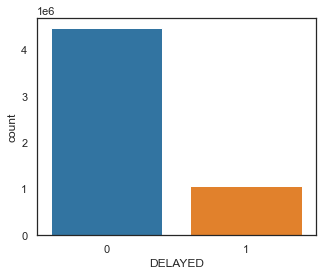

In [33]:
# Find the percentage of DELAYED Flights in the Train Dataset
print('TRAIN DATASET')

idx_cnt  = df_train['DELAYED'].value_counts().sort_index().rename('DELAYED_COUNT')
tot_cnt  = len(df_train['DELAYED'])

rate_cnt = round(idx_cnt/tot_cnt*100,2).rename('DELAYED_PERC')

display(pd.concat([idx_cnt,rate_cnt],axis=1))

plt.figure(figsize=(5,4))
sns.countplot(data=df_train,x='DELAYED',label="Count")

% 19.17 of the flights in the train dataset classified as DELAYED

TEST DATASET


,DELAYED_COUNT,DELAYED_PERC
0,790154,79.43
1,204586,20.57


<AxesSubplot:xlabel='DELAYED', ylabel='count'>

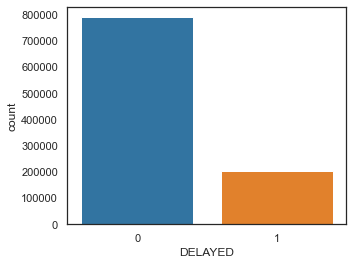

In [34]:
# Find the percentage of DELAYED Flights in the Test Dataset
print('TEST DATASET')

idx_cnt  = df_test['DELAYED'].value_counts().sort_index().rename('DELAYED_COUNT')
tot_cnt  = len(df_test['DELAYED'])

rate_cnt = round(idx_cnt/tot_cnt*100,2).rename('DELAYED_PERC')

display(pd.concat([idx_cnt,rate_cnt],axis=1))

plt.figure(figsize=(5,4))
sns.countplot(data=df_test,x='DELAYED',label="Count")

% 20.57 of the flights in the test dataset classified as DELAYED

# 3. Features

In [35]:
unwanted_cols = ['DEP_TIME','DEP_DELAY','CRS_ARR_TIME','CRS_ARR_TIME','ARR_TIME','ARR_DELAY', 
                  'CANCELLED','CANCELLATION_CODE','CRS_ELAPSED_TIME','ACTUAL_ELAPSED_TIME']

remaining_cols = [] 

for i in list(df_train.columns):
    if i not in unwanted_cols+['DELAYED']:
        remaining_cols.append(i)
remaining_cols.append('DELAYED')

## 3.1 Exploratory Data Analysis

In [36]:
# some basic statistics for numeric variables 
df_train[remaining_cols].describe()

,OP_CARRIER_FL_NUM,CRS_DEP_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DELAYED
count,5.528595e+06,5.528595e+06,5.513455e+06,5.528595e+06,1.087253e+06,1.087253e+06,1.087253e+06,1.087253e+06,1.087253e+06,5.528595e+06
mean,2.418366e+03,1.328063e+03,1.138240e+02,8.215433e+02,2.010358e+01,3.868412e+00,1.605579e+01,1.075472e-01,2.629934e+01,1.916751e-01
std,1.641756e+03,4.911272e+02,7.072153e+01,5.956681e+02,6.202681e+01,3.192931e+01,3.548035e+01,4.003883e+00,5.066967e+01,3.936188e-01
min,1.000000e+00,1.000000e+00,4.000000e+00,4.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.134000e+03,9.100000e+02,6.100000e+01,3.770000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.098000e+03,1.320000e+03,9.500000e+01,6.510000e+02,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00
75%,3.558000e+03,1.735000e+03,1.440000e+02,1.065000e+03,1.700000e+01,0.000000e+00,2.000000e+01,0.000000e+00,3.200000e+01,0.000000e+00
max,7.439000e+03,2.359000e+03,6.690000e+02,4.983000e+03,2.592000e+03,2.692000e+03,1.498000e+03,1.078000e+03,2.014000e+03,1.000000e+00


In [37]:
# some basic statistics for object variables 
df_train[remaining_cols].describe(include="object")

,OP_UNIQUE_CARRIER,ORIGIN,DEST
count,5528595,5528595,5528595
unique,8,316,316
top,WN,ATL,ATL
freq,1328677,336715,336677


In [38]:
# checking how variables change with the target, obviously churned customers have lower values for visit related attributes and most likely have short period of contract 

df_train[remaining_cols].groupby('DELAYED').mean().T

DELAYED,0,1
OP_CARRIER_FL_NUM,2428.028786,2377.614531
CRS_DEP_TIME,1284.333746,1512.478613
AIR_TIME,113.161580,116.624746
DISTANCE,815.677931,846.278670
CARRIER_DELAY,1.800117,25.337736
WEATHER_DELAY,0.194870,4.918919
NAS_DELAY,24.697113,13.584666
SECURITY_DELAY,0.013302,0.134498
LATE_AIRCRAFT_DELAY,1.066909,33.514941


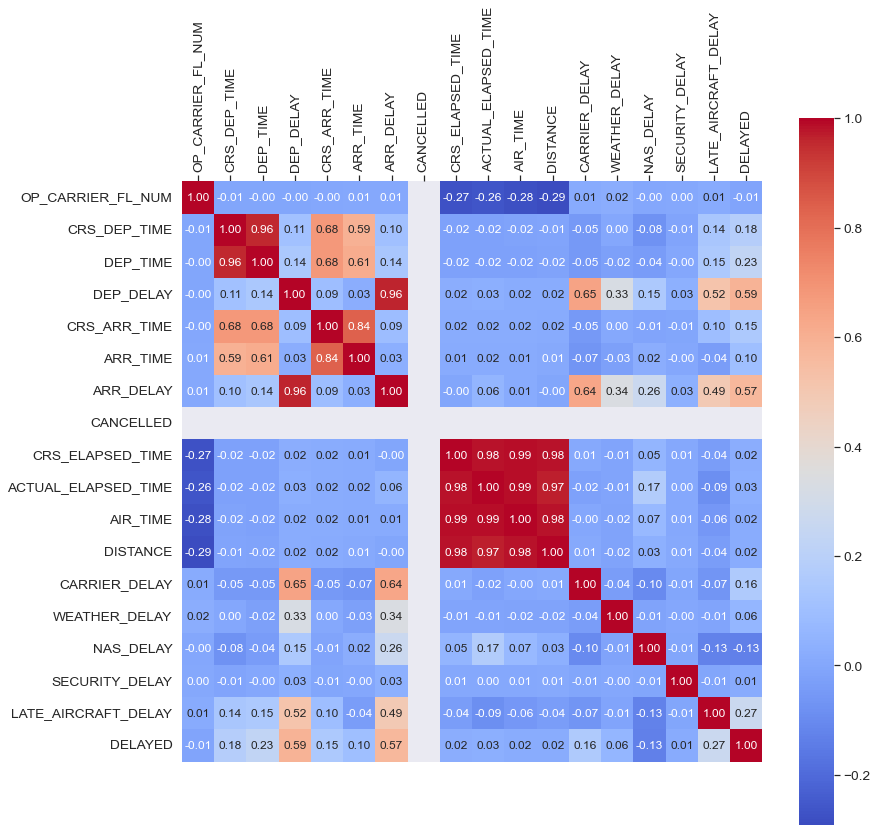

In [39]:
# Correlation table
sns.set(font_scale = 1.25)
correlation_matrix = df_train.corr()
plt.figure(figsize=(13,13))
ax = sns.heatmap(correlation_matrix, vmax=1, cbar=True, square=True, annot=True, fmt='.2f', 
                 annot_kws={'size': 12}, cmap='coolwarm')
ax.xaxis.set_ticks_position('top')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

## 3.0 `FL_DATE` 

`FL_DATE`: Flight Date (yyyymmdd)

<AxesSubplot:>

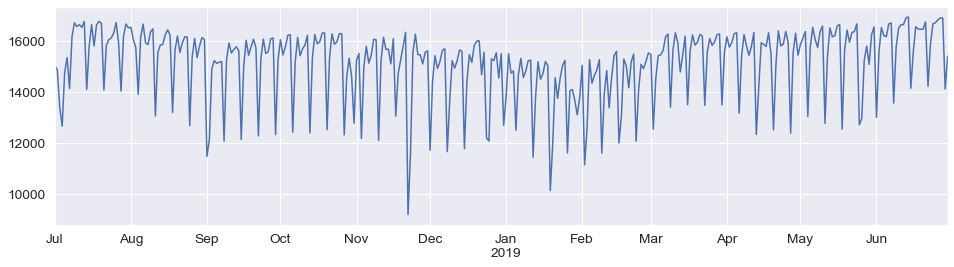

In [40]:
df_plot = df_train['FL_DATE'].value_counts().sort_index()

min_date = df_train['FL_DATE'].min()
max_date = df_train['FL_DATE'].max()

plt.figure(figsize=(16,4))
df_plot.plot()

<AxesSubplot:title={'center':'Daily Flights'}>

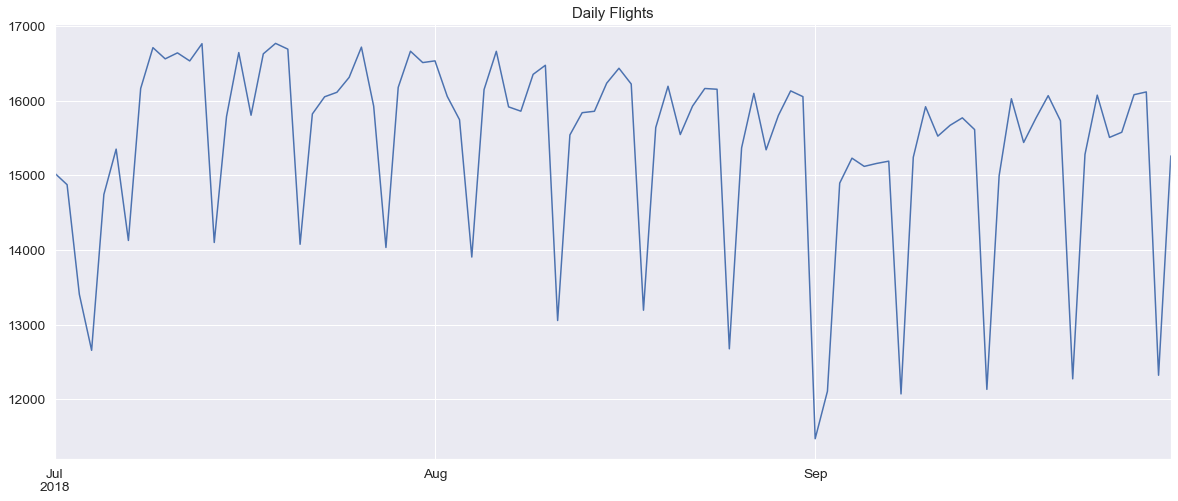

In [41]:
#Look Closer
cnd = df_train['FL_DATE']<'2018-10-01'
df_plot = df_train.loc[cnd,'FL_DATE'].value_counts().sort_index()

plt.figure(figsize=(20,8))
df_plot.plot(title = 'Daily Flights')

It is obvious that there is a weekly periodicity for the data, they may affect the delay. Let's create a new feature and checked it. 

In [42]:
df_train['DAYOFWEEK'] = df_train['FL_DATE'].dt.dayofweek
df_train['MONTH'] = df_train['FL_DATE'].dt.month
df_train[['FL_DATE','DAYOFWEEK','MONTH']].sample(4)

,FL_DATE,DAYOFWEEK,MONTH
15373,2018-07-01,6,7
6420792,2019-05-19,6,5
3805909,2019-01-08,1,1
4782247,2019-02-28,3,2


<b> Q. Which week days have lower/higher delayed flight rates? </b> 

In [43]:
a = pd.concat([
    pd.DataFrame(df_train.groupby('DAYOFWEEK')['DELAYED'].count()).rename(columns={'DELAYED':'COUNT'}),
    pd.DataFrame(df_train.groupby('DAYOFWEEK')['DELAYED'].sum())
],axis = 1
)
a['RATE'] = (a['DELAYED']/a['COUNT']*100).round(2)
a.sort_values(by='RATE')


,COUNT,DELAYED,RATE
DAYOFWEEK,,,
2,806794,140741,17.44
5,665692,117042,17.58
1,798754,141257,17.68
6,792661,152346,19.22
0,817996,161038,19.69
3,819722,171177,20.88
4,826976,176093,21.29


with respect to overall delayed rate(%19.17) in the training dataset;
* Wednesday, Saturday and Tuesday has lower DELAYED flight rates <br>
* Saturday and Monday have almost similar rate <br>
* Thursday and Friday has higher DELAYED flight rates <br>

<b> Q. Which Months have lower/higher delayed flight rates? </b> 

In [44]:
a = pd.concat([
    pd.DataFrame(df_train.groupby('MONTH')['DELAYED'].count()).rename(columns={'DELAYED':'COUNT'}),    
    pd.DataFrame(df_train.groupby('MONTH')['DELAYED'].sum()),
    pd.DataFrame(df_train.groupby('MONTH')['DELAYED'].count()).rank().rename(columns={'DELAYED':'COUNT_RANK(ASC)'}),
    pd.DataFrame(df_train.groupby('MONTH')['DELAYED'].sum()).rank().rename(columns={'DELAYED':'DELAYED_RANK(ASC)'}),
],axis = 1
)
a['RATE'] = (a['DELAYED']/a['COUNT']*100).round(2)
a.sort_values(by='RATE')

,COUNT,DELAYED,COUNT_RANK(ASC),DELAYED_RANK(ASC),RATE
MONTH,,,,,
9,445641,66100,3.0,1.0,14.83
10,473180,70860,7.0,2.0,14.98
3,477178,83946,8.0,6.0,17.59
1,436546,76949,2.0,3.0,17.63
11,447256,80255,4.0,4.0,17.94
12,452784,81601,5.0,5.0,18.02
4,462111,84472,6.0,7.0,18.28
5,483157,98698,10.0,9.0,20.43
2,399478,86571,1.0,8.0,21.67


* <b>Summer Flights, especially June and July, have the highest</b> DELAYED rate compared to other seasons
* <b>September and October has the far away lowest</b> DELAYED rate


In [45]:
# Add 'FL_DATE' into unwanted_cols list
unwanted_cols.append('FL_DATE')

## 3.2 `OP_UNIQUE_CARRIER` 

`OP_UNIQUE_CARRIER`: Unique Carrier Code

<b> Q. Which Carrier have lower/higher delayed flight rates? </b> 

In [46]:
a = pd.concat([
    pd.DataFrame(df_train.groupby('OP_UNIQUE_CARRIER')['DELAYED'].count()).rename(columns={'DELAYED':'COUNT'}),
    pd.DataFrame(df_train.groupby('OP_UNIQUE_CARRIER')['DELAYED'].sum())
],axis = 1
)
a['RATE'] = (a['DELAYED']/a['COUNT']*100).round(2)
a.sort_values(by='RATE')

,COUNT,DELAYED,RATE
OP_UNIQUE_CARRIER,,,
DL,964821,138501,14.36
YX,310451,51023,16.44
OO,788996,138738,17.58
MQ,300794,54726,18.19
UA,627100,121141,19.32
AA,912072,187294,20.54
WN,1328677,291874,21.97
B6,295684,76397,25.84


* <b>DL has best</b> rate whereas <b>B6 has the worst</b> rate in terms of target value

Before modelling, we should encode this feature.

## 3.2 `OP_CARRIER_FL_NUM` 

`OP_CARRIER_FL_NUM`: Flight Number

In [47]:
df_check(df_train[['OP_CARRIER_FL_NUM']])

shape: (5528595, 1)


,column,dtypes,count,nunique,sum_null,null_ratio
0,OP_CARRIER_FL_NUM,int64,5528595,7064,0,0.0


In [48]:
df_train['OP_CARRIER_FL_NUM'].value_counts()

2116    2707
352     2609
669     2505
677     2494
495     2488
        ... 
6275       7
6930       7
6407       7
6975       7
6791       7
Name: OP_CARRIER_FL_NUM, Length: 7064, dtype: int64

In [49]:
df_train['OP_CARRIER_FL_NUM'].value_counts().describe()

count    7064.000000
mean      782.643686
std       555.704321
min         7.000000
25%       341.000000
50%       668.000000
75%      1219.000000
max      2707.000000
Name: OP_CARRIER_FL_NUM, dtype: float64

In [50]:
# Find the OP_CARRIER_FL_NUMs at least 100 flights

a = df_train['OP_CARRIER_FL_NUM'].value_counts()
a = a[a>=100]
a

2116    2707
352     2609
669     2505
677     2494
495     2488
        ... 
5108     101
6878     100
6615     100
6921     100
4875     100
Name: OP_CARRIER_FL_NUM, Length: 6268, dtype: int64

In [51]:
df_train[['OP_CARRIER_FL_NUM','DELAYED']].corr()

,OP_CARRIER_FL_NUM,DELAYED
OP_CARRIER_FL_NUM,1.000000,-0.012087
DELAYED,-0.012087,1.000000


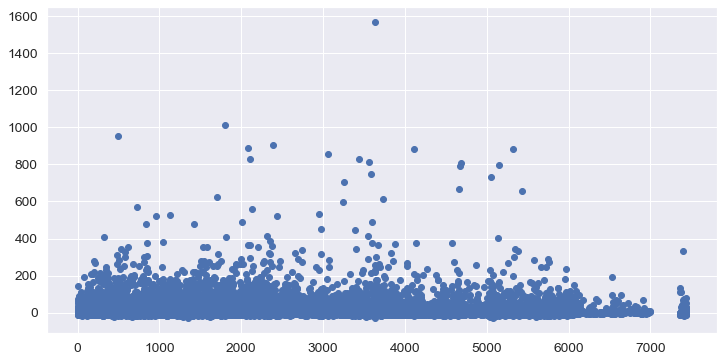

In [52]:
samp_size = 20000
df_plot = df_train.sample(samp_size, random_state=10)

plt.figure(figsize=(12,6))
plt.scatter(data=df_plot,x='OP_CARRIER_FL_NUM',y='DEP_DELAY')
plt.show()

We may drop OP_CARRIER_FL_NUM feature

## 3.3 `ORIGIN`  & `DEST` 

`ORIGIN`: Origin Airport Code <br>
`DEST`: Destination Airport Code

In [53]:
pd.concat([
    df_check(df_train[['ORIGIN']]),
    df_check(df_train[['DEST']]),
]
)

shape: (5528595, 1)
shape: (5528595, 1)


,column,dtypes,count,nunique,sum_null,null_ratio
0,ORIGIN,object,5528595,316,0,0.0
0,DEST,object,5528595,316,0,0.0


As the number of flights increases, the delay may increase. Therefore, I will create a featere called total_flights.

In [54]:
a = pd.concat([
        (df_train['ORIGIN'].value_counts()).rename('COUNT_ORIGIN'),
        #(df_train['ORIGIN'].value_counts().sort_index().rank(ascending=True)).rename('RANK_ORIGIN'),
        (df_train['DEST'].value_counts()).rename('COUNT_DEST'),
        #(df_train['DEST'].value_counts().sort_index().rank(ascending=True)).rename('RANK_DEST')
],axis=1
)
a['TOTAL_FL'] = a['COUNT_ORIGIN'] + a['COUNT_DEST']

b = pd.DataFrame(a['TOTAL_FL'].rank(ascending=True).rename('RANK_TOTAL_FL'))

c = pd.DataFrame(df_train.groupby('ORIGIN')['DELAYED'].mean())

df_rank_fl = pd.concat([a,b,c],axis=1)
df_rank_fl.head(5)

,COUNT_ORIGIN,COUNT_DEST,TOTAL_FL,RANK_TOTAL_FL,DELAYED
ATL,336715,336677,673392,316.0,0.177159
ORD,297740,297133,594873,315.0,0.224421
DFW,224730,224452,449182,314.0,0.233066
DEN,207982,207859,415841,313.0,0.202460
LAX,184270,184152,368422,312.0,0.189287


In [55]:
df_rank_fl[['RANK_TOTAL_FL','DELAYED']].corr()

,RANK_TOTAL_FL,DELAYED
RANK_TOTAL_FL,1.000000,0.174602
DELAYED,0.174602,1.000000


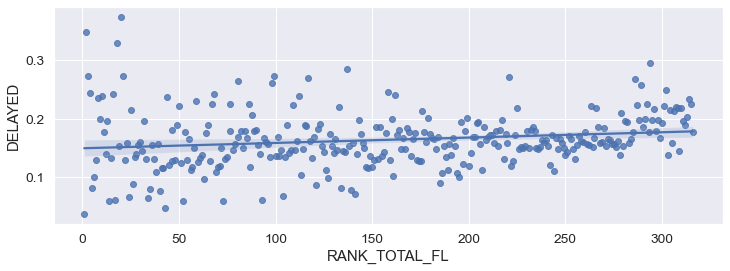

In [56]:
plt.figure(figsize=(12,4))
sns.regplot(data=df_rank_fl,x='RANK_TOTAL_FL', y='DELAYED');

RANK_TOTAL_FL is the rank with respect to counting both 'ORIGIN' and 'DEST' flights.

There are slighly linearity between RANK_TOTAL_FL and the mean of the DELAYED.

Let's add this new feature to the train dataset.



In [57]:
# Add the new feature called RANK_TOTAL_FL
df_train = pd.merge(df_train,
                    df_rank_fl['RANK_TOTAL_FL'],
                    left_on='ORIGIN', 
                    right_index=True
                   )

Therefore, we don't need the 'ORIGIN' and 'DEST' anymore. 

In [58]:
# Add 'ORIGIN' and 'DEST' into unwanted_cols list
unwanted_cols.append('ORIGIN')
unwanted_cols.append('DEST')

## 3.4 `CRS_DEP_TIME`

`CRS_DEP_TIME`: CRS Departure Time (local time: hhmm)<br>

CRS_DEP_TIME the only time that we can use in our model, let's check its relation between delay

In [59]:
df_check(df_train[['CRS_DEP_TIME']])

shape: (5528595, 1)


,column,dtypes,count,nunique,sum_null,null_ratio
0,CRS_DEP_TIME,int64,5528595,1344,0,0.0


<AxesSubplot:xlabel='DELAYED', ylabel='CRS_DEP_TIME'>

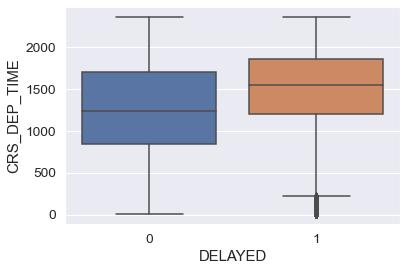

In [60]:
sns.boxplot(x=df_train['DELAYED'],y=df_train['CRS_DEP_TIME'])

<AxesSubplot:xlabel='CRS_DEP_TIME', ylabel='Count'>

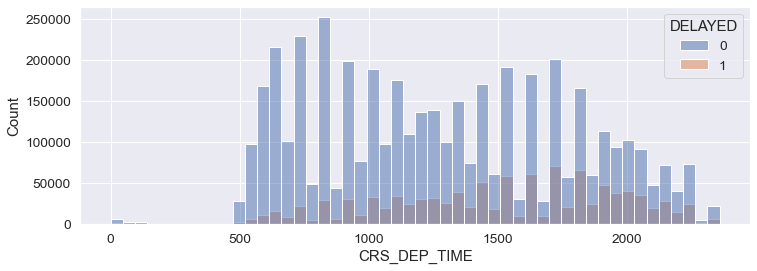

In [61]:
plt.figure(figsize=(12,4))
sns.histplot(df_train, x='CRS_DEP_TIME', bins=50, hue='DELAYED')

In [62]:
df_train['CRS_DEP_HOUR'] = (df_train['CRS_DEP_TIME']/100).apply(np.floor)

df_train[['CRS_DEP_TIME','CRS_DEP_HOUR']].sample(5)

,CRS_DEP_TIME,CRS_DEP_HOUR
5525074,1530,15.0
827932,2008,20.0
7167871,1450,14.0
1375821,2055,20.0
3395427,1035,10.0


In [63]:
pd.concat([
    df_train.groupby('CRS_DEP_HOUR')['DELAYED'].count().rename('Count'),
    df_train.groupby('CRS_DEP_HOUR')['DELAYED'].mean().rename('Mean')
],axis=1
)

,Count,Mean
CRS_DEP_HOUR,,
0.0,10350,0.167536
1.0,3753,0.189448
2.0,1232,0.310065
3.0,1137,0.254178
4.0,642,0.174455
5.0,135517,0.061594
6.0,410755,0.065097
7.0,370671,0.087261
8.0,377956,0.106552


In [64]:
df_train[['CRS_DEP_TIME','CRS_DEP_HOUR']].corr()

,CRS_DEP_TIME,CRS_DEP_HOUR
CRS_DEP_TIME,1.000000,0.999322
CRS_DEP_HOUR,0.999322,1.000000


I choose using CRS_DEP_HOUR instead of CRS_DEP_TIME

In [65]:
# Add 'CRS_DEP_TIME' into unwanted_cols list
unwanted_cols.append('CRS_DEP_TIME')

## 3.4 `DEP_TIME` & `DEP_DELAY`

`DEP_TIME`: Actual Departure Time (local time :  hhmm)<br>
`DEP_DELAY`: Difference in minutes between scheduled and actual departure time. Early departures show negative numbers.

`CRS_ARR_TIME`: CRS Arrival Time (local time :  hhmm) <br>
`ARR_TIME`: Actual Arrival Time (local time :  hhmm) <br>
`ARR_DELAY`: Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers.

In [66]:
pd.concat([
    df_check(df_train[['DEP_TIME']]),
    df_check(df_train[['DEP_DELAY']]),
]
)

shape: (5528595, 1)
shape: (5528595, 1)


,column,dtypes,count,nunique,sum_null,null_ratio
0,DEP_TIME,float64,5528595,1440,0,0.0
0,DEP_DELAY,float64,5528595,1484,0,0.0


In [67]:
df_train[['DEP_TIME','DEP_DELAY','DELAYED']].sample(5)

,DEP_TIME,DEP_DELAY,DELAYED
4533366,1059.0,8.0,0
2075890,1852.0,12.0,0
915541,922.0,-8.0,0
1033694,952.0,-3.0,0
2969335,1440.0,44.0,1


<AxesSubplot:xlabel='CRS_DEP_TIME', ylabel='Count'>

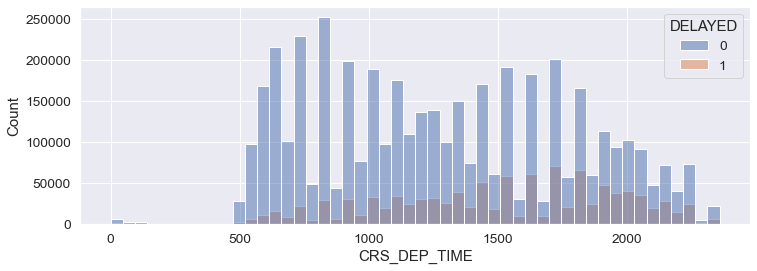

In [68]:
plt.figure(figsize=(12,4))
sns.histplot(df_train, x='CRS_DEP_TIME', bins=50, hue='DELAYED')

<AxesSubplot:xlabel='DEP_TIME', ylabel='Count'>

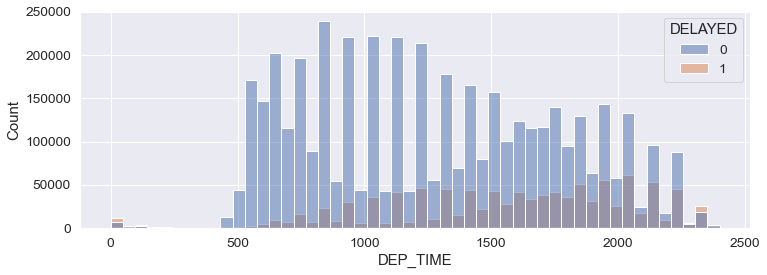

In [69]:
plt.figure(figsize=(12,4))
sns.histplot(df_train, x='DEP_TIME', bins=50, hue='DELAYED')

<AxesSubplot:xlabel='DEP_DELAY', ylabel='Count'>

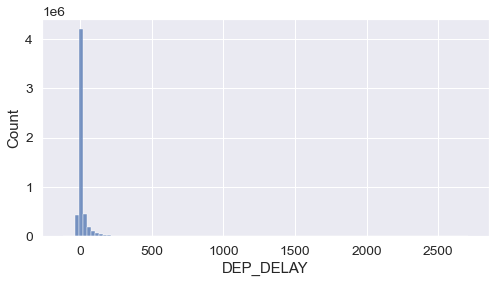

In [70]:
plt.figure(figsize=(8,4))
sns.histplot(df_train, x='DEP_DELAY', bins=100)

<AxesSubplot:xlabel='DEP_DELAY', ylabel='Count'>

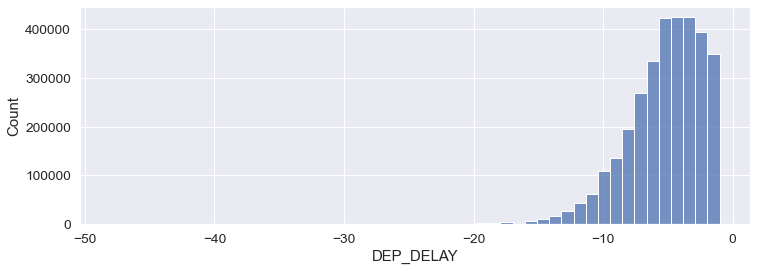

In [71]:
#Zooming into Negative DEP_DELAYs
cnd1 = df_train['DEP_DELAY'] < 0
cnd2 = df_train['DEP_DELAY'] > -50

plt.figure(figsize=(12,4))
sns.histplot(df_train[cnd1 & cnd2], x='DEP_DELAY', bins=50)

<AxesSubplot:xlabel='DEP_DELAY', ylabel='Count'>

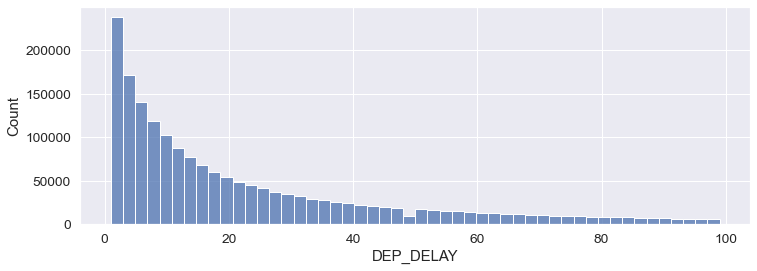

In [72]:
#Zooming into Pozitive DEP_DELAYs
cnd1 = df_train['DEP_DELAY'] < 100
cnd2 = df_train['DEP_DELAY'] > 0


plt.figure(figsize=(12,4))
sns.histplot(df_train[cnd1 & cnd2], x='DEP_DELAY', bins=50)

<AxesSubplot:xlabel='DEP_DELAY', ylabel='Count'>

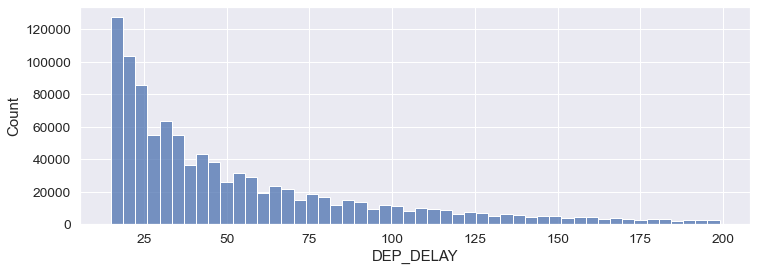

In [73]:
#Zooming into Pozitive DEP_DELAYs
cnd1 = df_train['DEP_DELAY'] >= 15
cnd2 = df_train['DEP_DELAY'] < 200


plt.figure(figsize=(12,4))
sns.histplot(df_train[cnd1 & cnd2], x='DEP_DELAY', bins=50)

## 3.5 `CRS_ARR_TIME`  & `ARR_TIME`  & `ARR_DELAY` 

`CRS_ARR_TIME`: CRS Arrival Time (local time :  hhmm) <br>
`ARR_TIME`: Actual Arrival Time (local time :  hhmm) <br>
`ARR_DELAY`: Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers.

In [74]:
pd.concat([
    df_check(df_train[['CRS_ARR_TIME']]),
    df_check(df_train[['ARR_TIME']]),
    df_check(df_train[['ARR_DELAY']]),
]
)

shape: (5528595, 1)
shape: (5528595, 1)
shape: (5528595, 1)


,column,dtypes,count,nunique,sum_null,null_ratio
0,CRS_ARR_TIME,int64,5528595,1426,0,0.0
0,ARR_TIME,float64,5526457,1440,2138,0.0
0,ARR_DELAY,float64,5513455,1505,15140,0.3


In [75]:
df_train[['CRS_ARR_TIME','ARR_TIME','ARR_DELAY']].sample(5)

,CRS_ARR_TIME,ARR_TIME,ARR_DELAY
5271272,2341,2316.0,-25.0
3740933,1021,952.0,-29.0
5158304,1301,1252.0,-9.0
2887423,1131,1131.0,0.0
3023659,1939,1926.0,-13.0


<AxesSubplot:xlabel='CRS_ARR_TIME', ylabel='Count'>

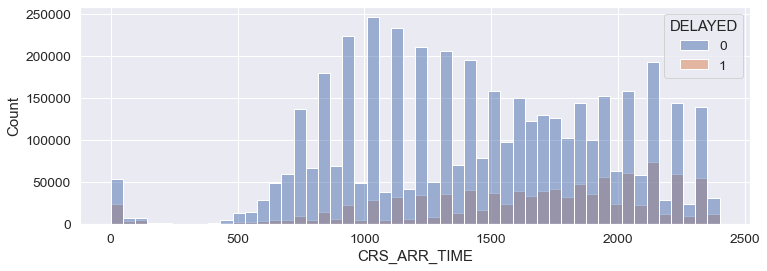

In [76]:
plt.figure(figsize=(12,4))
sns.histplot(df_train, x='CRS_ARR_TIME', bins=50,hue = 'DELAYED')

<AxesSubplot:xlabel='ARR_TIME', ylabel='Count'>

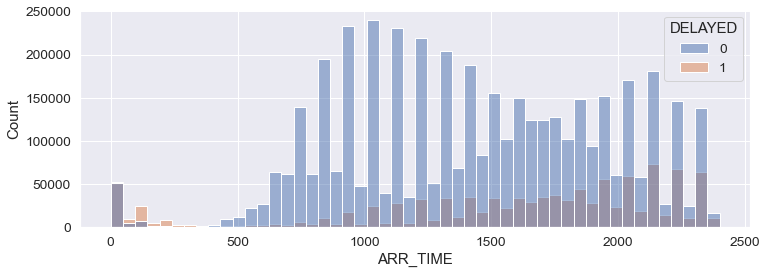

In [77]:
plt.figure(figsize=(12,4))
sns.histplot(df_train, x='ARR_TIME', bins=50, hue = 'DELAYED')

<AxesSubplot:xlabel='ARR_DELAY', ylabel='Count'>

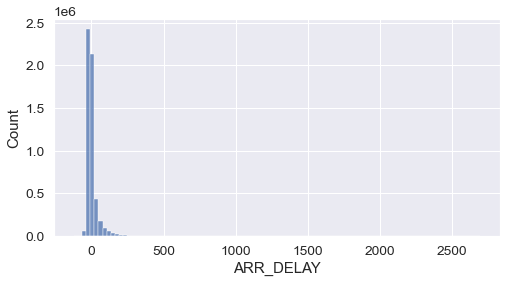

In [78]:
plt.figure(figsize=(8,4))
sns.histplot(df_train, x='ARR_DELAY', bins=100)

<AxesSubplot:xlabel='ARR_DELAY', ylabel='Count'>

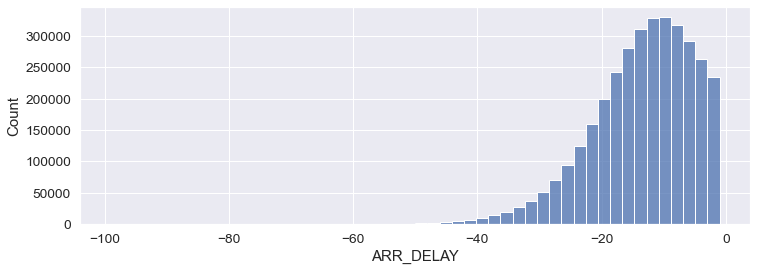

In [79]:
#Check Negative ARR_DELAYs
cnd1 = df_train['ARR_DELAY'] < 0
cnd2 = df_train['ARR_DELAY'] > -100

plt.figure(figsize=(12,4))
sns.histplot(df_train[cnd1 & cnd2], x='ARR_DELAY', bins=50)

<AxesSubplot:xlabel='ARR_DELAY', ylabel='Count'>

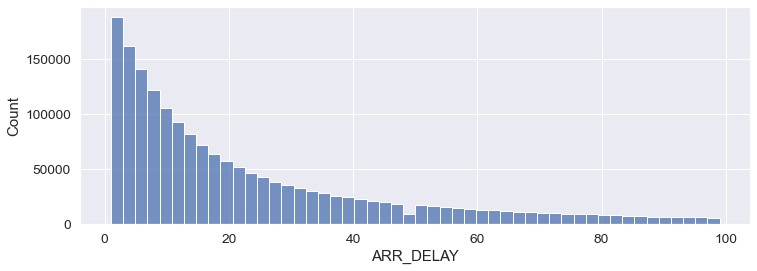

In [80]:
#Check Positive ARR_DELAYs
cnd1 = df_train['ARR_DELAY'] < 100
cnd2 = df_train['ARR_DELAY'] > 0

plt.figure(figsize=(12,4))
sns.histplot(df_train[cnd1 & cnd2], x='ARR_DELAY', bins=50)

In [81]:
df_train.columns

Index(['FL_DATE', 'OP_UNIQUE_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY', 'CANCELLED', 'CANCELLATION_CODE', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'DELAYED', 'DAYOFWEEK', 'MONTH', 'RANK_TOTAL_FL', 'CRS_DEP_HOUR'],
      dtype='object')

In [82]:
df_train[['CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY', 'CRS_ELAPSED_TIME','ACTUAL_ELAPSED_TIME','AIR_TIME']]

,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME
137,1505,1500.0,-5.0,1748,1748.0,0.0,103.0,108.0,86.0
138,1702,1742.0,40.0,1842,1917.0,35.0,100.0,95.0,79.0
144,1730,1727.0,-3.0,1836,1830.0,-6.0,66.0,63.0,43.0
152,1045,1041.0,-4.0,1415,1339.0,-36.0,390.0,358.0,339.0
158,740,804.0,24.0,852,909.0,17.0,72.0,65.0,49.0
...,...,...,...,...,...,...,...,...,...
7214125,1010,1000.0,-10.0,1110,1101.0,-9.0,60.0,61.0,43.0
7226855,1010,959.0,-11.0,1110,1057.0,-13.0,60.0,58.0,42.0
7255062,1010,958.0,-12.0,1110,1105.0,-5.0,60.0,67.0,44.0
7269030,1240,1256.0,16.0,1342,1354.0,12.0,62.0,58.0,42.0


## 3.7 `CRS_ELAPSED_TIME` & `ACTUAL_ELAPSED_TIME` 

`CRS_ELAPSED_TIME`: CRS Elapsed Time of Flight, in Minutes<br>
`ACTUAL_ELAPSED_TIME`: Elapsed Time of Flight, in Minutes<br>
`AIR_TIME`: Flight Time, in Minutes

In [83]:
pd.concat([
    df_check(df_train[['CRS_ELAPSED_TIME']]),
    df_check(df_train[['ACTUAL_ELAPSED_TIME']]),
    df_check(df_train[['AIR_TIME']])
]
)

shape: (5528595, 1)
shape: (5528595, 1)
shape: (5528595, 1)


,column,dtypes,count,nunique,sum_null,null_ratio
0,CRS_ELAPSED_TIME,float64,5528595,559,0,0.0
0,ACTUAL_ELAPSED_TIME,float64,5513455,694,15140,0.3
0,AIR_TIME,float64,5513455,650,15140,0.3


In [84]:
df_train[['CRS_ELAPSED_TIME','ACTUAL_ELAPSED_TIME','AIR_TIME']].sample(5)

,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME
21268,120.0,113.0,93.0
471920,75.0,72.0,60.0
6816778,187.0,192.0,150.0
6066392,85.0,73.0,57.0
7137673,165.0,177.0,143.0


In [85]:
df_train[['CRS_ELAPSED_TIME','ACTUAL_ELAPSED_TIME','AIR_TIME']].describe()

,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME
count,5.528595e+06,5.513455e+06,5.513455e+06
mean,1.438686e+02,1.387080e+02,1.138240e+02
std,7.287274e+01,7.288151e+01,7.072153e+01
min,-9.900000e+01,1.600000e+01,4.000000e+00
25%,9.000000e+01,8.400000e+01,6.100000e+01
50%,1.250000e+02,1.210000e+02,9.500000e+01
75%,1.750000e+02,1.710000e+02,1.440000e+02
max,8.130000e+02,7.610000e+02,6.690000e+02


<AxesSubplot:xlabel='CRS_ELAPSED_TIME', ylabel='Count'>

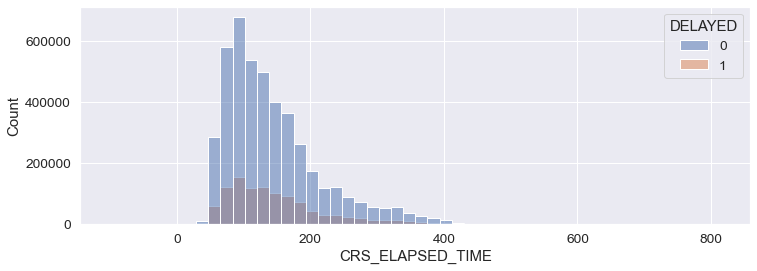

In [86]:
plt.figure(figsize=(12,4))
sns.histplot(df_train, x='CRS_ELAPSED_TIME', bins=50, hue = 'DELAYED')

<AxesSubplot:xlabel='ACTUAL_ELAPSED_TIME', ylabel='Count'>

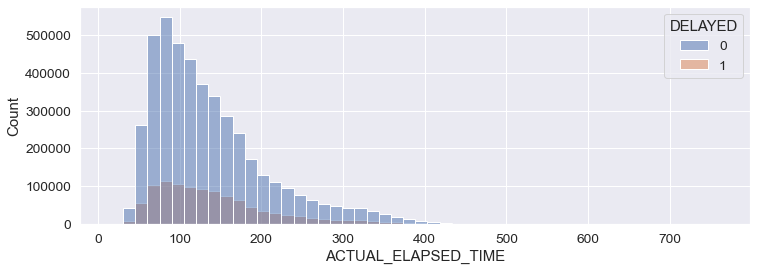

In [87]:
plt.figure(figsize=(12,4))
sns.histplot(df_train, x='ACTUAL_ELAPSED_TIME', bins=50, hue = 'DELAYED') 

<AxesSubplot:xlabel='AIR_TIME', ylabel='Count'>

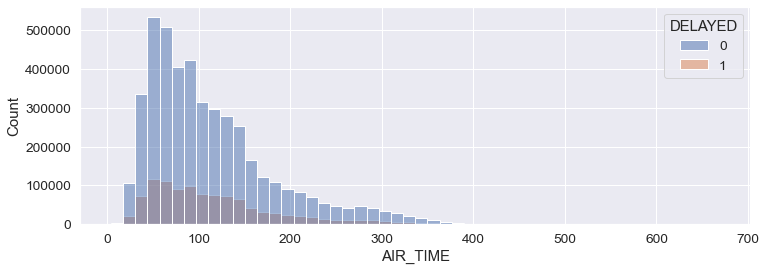

In [88]:
plt.figure(figsize=(12,4))
sns.histplot(df_train, x='AIR_TIME', bins=50, hue = 'DELAYED')

## 3.8 `AIR_TIME` & `DISTANCE` 

`DISTANCE`: Distance between airports (miles)<br>
`AIR_TIME`: Flight Time, in Minutes


In [89]:
df_check(df_train[['DISTANCE','AIR_TIME']])

shape: (5528595, 2)


,column,dtypes,count,nunique,sum_null,null_ratio
0,DISTANCE,float64,5528595,1409,0,0.0
1,AIR_TIME,float64,5513455,650,15140,0.3


In [90]:
df_train[['DISTANCE','AIR_TIME','DELAYED']].corr()

,DISTANCE,AIR_TIME,DELAYED
DISTANCE,1.000000,0.982892,0.020221
AIR_TIME,0.982892,1.000000,0.019260
DELAYED,0.020221,0.019260,1.000000


As expected, DISTANCE and AIR_TIME highlt correlated (0.98) and AIR_TIME has some missing values, I won't use AIR_TIME my prediction.

In [91]:
# Add 'AIR_TIME' into unwanted_cols list
unwanted_cols.append('AIR_TIME')

<AxesSubplot:xlabel='DELAYED', ylabel='DISTANCE'>

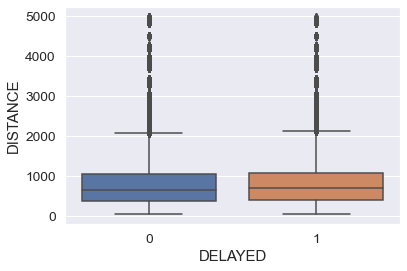

In [92]:
sns.boxplot(x=df_train['DELAYED'],y=df_train['DISTANCE'])

In [93]:
df_train[['DISTANCE','DELAYED']].corr()

,DISTANCE,DELAYED
DISTANCE,1.000000,0.020221
DELAYED,0.020221,1.000000


In [94]:
df_train['DISTANCE'].describe()

count    5.528595e+06
mean     8.215433e+02
std      5.956681e+02
min      4.500000e+01
25%      3.770000e+02
50%      6.510000e+02
75%      1.065000e+03
max      4.983000e+03
Name: DISTANCE, dtype: float64

In [95]:
df_train.columns

Index(['FL_DATE', 'OP_UNIQUE_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY', 'CANCELLED', 'CANCELLATION_CODE', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'DELAYED', 'DAYOFWEEK', 'MONTH', 'RANK_TOTAL_FL', 'CRS_DEP_HOUR'],
      dtype='object')

## 3.9 DELAYS

`CARRIER_DELAY`: Carrier Delay, in Minutes<br>
`WEATHER_DELAY`: Weather Delay, in Minutes<br>
`NAS_DELAY`: National Air System Delay, in Minutes<br>
`SECURITY_DELAY`: Security Delay, in Minutes<br>
`LATE_AIRCRAFT_DELAY`: Late Aircraft Delay, in Minutes

In [96]:
pd.concat([
    df_check(df_train[['CARRIER_DELAY']]),
    df_check(df_train[['WEATHER_DELAY']]),
    df_check(df_train[['NAS_DELAY']]),
    df_check(df_train[['SECURITY_DELAY']]),
    df_check(df_train[['LATE_AIRCRAFT_DELAY']])
]
)

shape: (5528595, 1)
shape: (5528595, 1)
shape: (5528595, 1)
shape: (5528595, 1)
shape: (5528595, 1)


,column,dtypes,count,nunique,sum_null,null_ratio
0,CARRIER_DELAY,float64,1087253,1332,4441342,80.3
0,WEATHER_DELAY,float64,1087253,1012,4441342,80.3
0,NAS_DELAY,float64,1087253,808,4441342,80.3
0,SECURITY_DELAY,float64,1087253,239,4441342,80.3
0,LATE_AIRCRAFT_DELAY,float64,1087253,936,4441342,80.3


In [97]:
cols = ['CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY']
cnd = ~(df_train['CARRIER_DELAY'].isna())

df_train.loc[cnd,cols].sample(5)

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
4158388,0.0,9.0,0.0,0.0,24.0
4037407,22.0,0.0,0.0,0.0,0.0
443649,7.0,0.0,69.0,0.0,0.0
4976139,0.0,0.0,24.0,0.0,0.0
2885926,8.0,0.0,8.0,0.0,0.0


In [98]:
cnd1 = df_train['DELAYED']==0
cnd2 = ~(df_train['CARRIER_DELAY'].isna())

df_train.loc[(cnd1 & cnd2),['CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY']]

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
223,6.0,0.0,20.0,0.0,0.0
279,9.0,0.0,10.0,0.0,0.0
3841,6.0,0.0,15.0,0.0,0.0
3906,0.0,0.0,11.0,0.0,10.0
4142,0.0,0.0,12.0,14.0,0.0
...,...,...,...,...,...
6996466,0.0,0.0,61.0,0.0,0.0
6696350,0.0,0.0,15.0,0.0,0.0
6597107,0.0,0.0,60.0,0.0,0.0
6871819,0.0,0.0,22.0,0.0,0.0


In [99]:
cnd1 = df_train['DELAYED']==1
cnd2 = ~(df_train['CARRIER_DELAY'].isna())

df_train.loc[(cnd1 & cnd2),['CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY']]

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
138,35.0,0.0,0.0,0.0,0.0
158,17.0,0.0,0.0,0.0,0.0
170,18.0,0.0,2.0,0.0,0.0
173,0.0,0.0,0.0,0.0,20.0
191,16.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
7183409,127.0,0.0,12.0,0.0,0.0
7203840,0.0,0.0,0.0,0.0,310.0
7263332,0.0,0.0,24.0,0.0,0.0
7263346,63.0,0.0,0.0,0.0,0.0


In [100]:
df_train[cols].describe()

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
count,1.087253e+06,1.087253e+06,1.087253e+06,1.087253e+06,1.087253e+06
mean,2.010358e+01,3.868412e+00,1.605579e+01,1.075472e-01,2.629934e+01
std,6.202681e+01,3.192931e+01,3.548035e+01,4.003883e+00,5.066967e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,4.000000e+00
75%,1.700000e+01,0.000000e+00,2.000000e+01,0.000000e+00,3.200000e+01
max,2.592000e+03,2.692000e+03,1.498000e+03,1.078000e+03,2.014000e+03


<AxesSubplot:xlabel='DELAYED', ylabel='WEATHER_DELAY'>

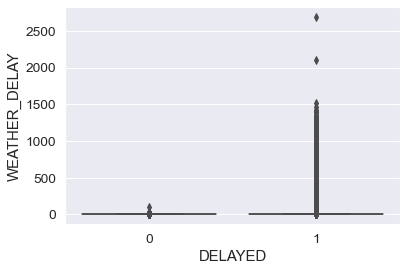

In [101]:
sns.boxplot(x=df_train['DELAYED'],y=df_train['WEATHER_DELAY'])

<AxesSubplot:xlabel='CARRIER_DELAY', ylabel='Count'>

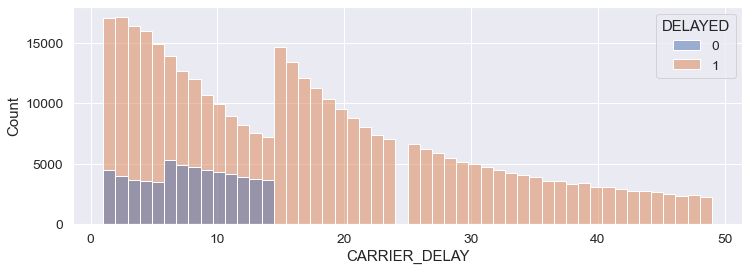

In [102]:
cnd1 = df_train['CARRIER_DELAY'] > 0
cnd2 = df_train['CARRIER_DELAY'] < 50

plt.figure(figsize=(12,4))
sns.histplot(df_train[cnd1 & cnd2], x='CARRIER_DELAY', bins=50, hue='DELAYED')

<AxesSubplot:xlabel='WEATHER_DELAY', ylabel='Count'>

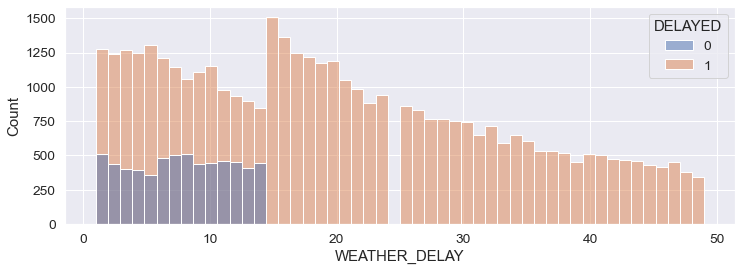

In [103]:
cnd1 = df_train['WEATHER_DELAY'] > 0
cnd2 = df_train['WEATHER_DELAY'] < 50

plt.figure(figsize=(12,4))
sns.histplot(df_train[cnd1 & cnd2], x='WEATHER_DELAY', bins=50, hue='DELAYED')

<AxesSubplot:xlabel='NAS_DELAY', ylabel='Count'>

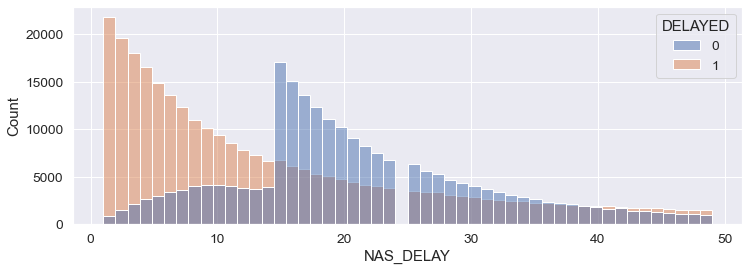

In [104]:
cnd1 = df_train['NAS_DELAY'] > 0
cnd2 = df_train['NAS_DELAY'] < 50

plt.figure(figsize=(12,4))
sns.histplot(df_train[cnd1 & cnd2], x='NAS_DELAY', bins=50, hue='DELAYED')

<AxesSubplot:xlabel='SECURITY_DELAY', ylabel='Count'>

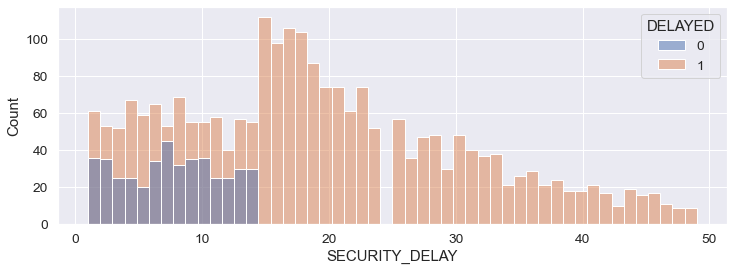

In [105]:
cnd1 = df_train['SECURITY_DELAY'] > 0
cnd2 = df_train['SECURITY_DELAY'] < 50

plt.figure(figsize=(12,4))
sns.histplot(df_train[cnd1 & cnd2], x='SECURITY_DELAY', bins=50, hue='DELAYED')

<AxesSubplot:xlabel='LATE_AIRCRAFT_DELAY', ylabel='Count'>

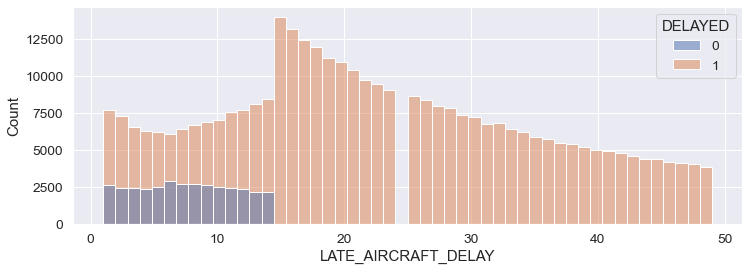

In [106]:
cnd1 = df_train['LATE_AIRCRAFT_DELAY'] > 0
cnd2 = df_train['LATE_AIRCRAFT_DELAY'] < 50

plt.figure(figsize=(12,4))
sns.histplot(df_train[cnd1 & cnd2], x='LATE_AIRCRAFT_DELAY', bins=50, hue='DELAYED')

In [107]:
# Since these delays has too many outliers, I will create 3 values for them.
# If the value is 
#     greater than 15 (our delay threshold), then _FLG will be 2 
#     between 1 and 14 then 1
#     otherwise, 0. 

cols = ['CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY']
cols2 = cols.copy()
for c in cols:
    new_c_name = c+'_FLG'
    cols2.append(new_c_name)
    df_train[new_c_name] = df_train[c].apply(lambda x: 2 if x>=15 else(1 if x>0 else 0))
    #df_train.loc[df_train[c]>1,new_c_name] = 1

In [108]:
df_train[cols2].head(5)

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,CARRIER_DELAY_FLG,WEATHER_DELAY_FLG,NAS_DELAY_FLG,SECURITY_DELAY_FLG,LATE_AIRCRAFT_DELAY_FLG
137,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0
138,35.0,0.0,0.0,0.0,0.0,2,0,0,0,0
144,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0
152,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0
158,17.0,0.0,0.0,0.0,0.0,2,0,0,0,0


In [109]:
# Turn the categorical values
#df_train = pd.get_dummies(df_train, columns = ['OP_UNIQUE_CARRIER'])

In [110]:
df_train[remaining_cols]

,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DELAYED
137,2018-07-01,AA,420,PHX,DEN,1505,86.0,602.0,NaN,NaN,NaN,NaN,NaN,0
138,2018-07-01,AA,421,PHX,RNO,1702,79.0,601.0,35.0,0.0,0.0,0.0,0.0,1
144,2018-07-01,AA,425,PHX,LAS,1730,43.0,255.0,NaN,NaN,NaN,NaN,NaN,0
152,2018-07-01,AA,432,PHX,OGG,1045,339.0,2845.0,NaN,NaN,NaN,NaN,NaN,0
158,2018-07-01,AA,438,PHX,SAN,740,49.0,304.0,17.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7214125,2019-06-26,YX,4607,HVN,PHL,1010,43.0,157.0,NaN,NaN,NaN,NaN,NaN,0
7226855,2019-06-27,YX,4607,HVN,PHL,1010,42.0,157.0,NaN,NaN,NaN,NaN,NaN,0
7255062,2019-06-28,YX,4607,HVN,PHL,1010,44.0,157.0,NaN,NaN,NaN,NaN,NaN,0
7269030,2019-06-29,YX,4514,HVN,PHL,1240,42.0,157.0,NaN,NaN,NaN,NaN,NaN,1


In [111]:
# The Only

In [112]:
for i in cols: 
    unwanted_cols.append(i)

remaining_cols = [] 
for i in list(df_train.columns):
    if i not in unwanted_cols+['DELAYED']:
        remaining_cols.append(i)
remaining_cols.append('DELAYED')

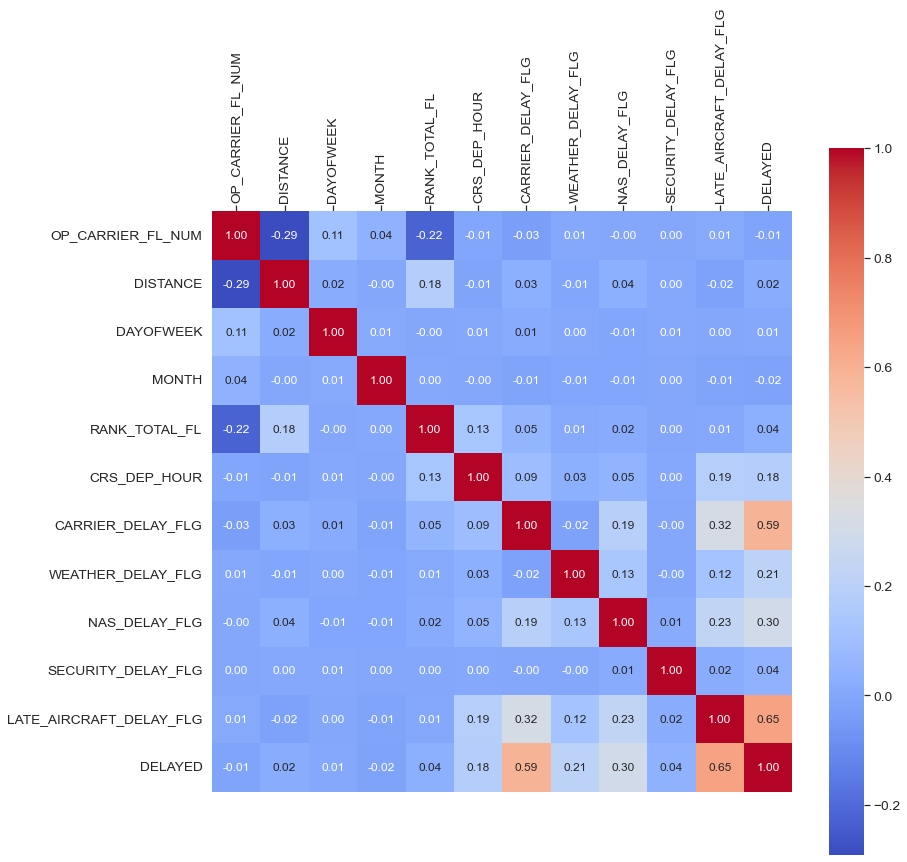

In [113]:
# Correlation table
sns.set(font_scale = 1.25)
correlation_matrix = df_train[remaining_cols].corr()
plt.figure(figsize=(13,13))
ax = sns.heatmap(correlation_matrix, vmax=1, cbar=True, square=True, annot=True, fmt='.2f', 
                 annot_kws={'size': 12}, cmap='coolwarm')
ax.xaxis.set_ticks_position('top')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [114]:
df_train.columns

Index(['FL_DATE', 'OP_UNIQUE_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY', 'CANCELLED', 'CANCELLATION_CODE', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'DELAYED', 'DAYOFWEEK', 'MONTH', 'RANK_TOTAL_FL', 'CRS_DEP_HOUR',
       'CARRIER_DELAY_FLG', 'WEATHER_DELAY_FLG', 'NAS_DELAY_FLG',
       'SECURITY_DELAY_FLG', 'LATE_AIRCRAFT_DELAY_FLG'],
      dtype='object')

In [115]:
df_test.columns

Index(['FL_DATE', 'OP_UNIQUE_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY', 'CANCELLED', 'CANCELLATION_CODE', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'DELAYED'],
      dtype='object')

In [116]:
############## FEATURE ENGINEERING FOR THE TEST DATA ##########

df_test['DAYOFWEEK'] = df_test['FL_DATE'].dt.dayofweek
df_test['MONTH'] = df_test['FL_DATE'].dt.month

df_test = pd.merge(df_test,
                    df_rank_fl['RANK_TOTAL_FL'],
                    left_on='ORIGIN', 
                    right_index=True
                   )

df_test['CRS_DEP_HOUR'] = (df_test['CRS_DEP_TIME']/100).apply(np.floor)

cols = ['CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY']

for c in cols:
    new_c_name = c+'_FLG'
    df_test[new_c_name] = df_test[c].apply(lambda x: 2 if x>=15 else(1 if x>0 else 0))

###############################################################

In [117]:
df_train[remaining_cols].head()

,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,DISTANCE,DAYOFWEEK,MONTH,RANK_TOTAL_FL,CRS_DEP_HOUR,CARRIER_DELAY_FLG,WEATHER_DELAY_FLG,NAS_DELAY_FLG,SECURITY_DELAY_FLG,LATE_AIRCRAFT_DELAY_FLG,DELAYED
137,AA,420,602.0,6,7,311.0,15.0,0,0,0,0,0,0
138,AA,421,601.0,6,7,311.0,17.0,2,0,0,0,0,1
144,AA,425,255.0,6,7,311.0,17.0,0,0,0,0,0,0
152,AA,432,2845.0,6,7,311.0,10.0,0,0,0,0,0,0
158,AA,438,304.0,6,7,311.0,7.0,2,0,0,0,0,1


In [118]:
df_train[remaining_cols].columns

Index(['OP_UNIQUE_CARRIER', 'OP_CARRIER_FL_NUM', 'DISTANCE', 'DAYOFWEEK',
       'MONTH', 'RANK_TOTAL_FL', 'CRS_DEP_HOUR', 'CARRIER_DELAY_FLG',
       'WEATHER_DELAY_FLG', 'NAS_DELAY_FLG', 'SECURITY_DELAY_FLG',
       'LATE_AIRCRAFT_DELAY_FLG', 'DELAYED'],
      dtype='object')

In [119]:
# import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import cluster as cl
from sklearn import model_selection as mdl
from sklearn import decomposition as dec
from sklearn import manifold as man
from sklearn import compose as com
from sklearn.base import TransformerMixin
from sklearn import linear_model as lin
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn import impute as imp
from sklearn.experimental import enable_iterative_imputer
from sklearn import tree
from sklearn import ensemble as ens
from sklearn.base import TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing as pre
from sklearn import metrics as met
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import datetime
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 300)

In [138]:
cat_var = ['OP_UNIQUE_CARRIER', 'DAYOFWEEK','MONTH', 'CRS_DEP_HOUR']

num_var = ['OP_CARRIER_FL_NUM', 'DISTANCE', 'RANK_TOTAL_FL',
          # 'CARRIER_DELAY_FLG', 'WEATHER_DELAY_FLG', 'NAS_DELAY_FLG', 'SECURITY_DELAY_FLG','LATE_AIRCRAFT_DELAY_FLG'
          ]

############# MODEL TRAINING ################
#############################################

X_train = df_train[cat_var+num_var]
y_train = df_train['DELAYED']

X_test = df_test[cat_var+num_var]
y_test = df_test['DELAYED']


print(f'X_train: {X_train.shape}\t, y_train: {y_train.shape}')
print(f'X_test:  {X_test.shape}\t, y_test:  {y_test.shape}')


X_train: (5528595, 7)	, y_train: (5528595,)
X_test:  (994709, 7)	, y_test:  (994709,)


In [139]:
X_train.head(3)

,OP_UNIQUE_CARRIER,DAYOFWEEK,MONTH,CRS_DEP_HOUR,OP_CARRIER_FL_NUM,DISTANCE,RANK_TOTAL_FL
137,AA,6,7,15.0,420,602.0,311.0
138,AA,6,7,17.0,421,601.0,311.0
144,AA,6,7,17.0,425,255.0,311.0


In [140]:
X_train.select_dtypes(include="object").columns

Index(['OP_UNIQUE_CARRIER'], dtype='object')

In [142]:
pipe_num = Pipeline([
                     ("scaler", pre.StandardScaler())
])

pipe_cat = Pipeline([
                     ("onehot", pre.OneHotEncoder(handle_unknown="ignore"))
])

ct = ColumnTransformer([
                      ("num", pipe_num, X_train.select_dtypes(exclude="object").columns), # numeric
                      ("cat", pipe_cat, X_train.select_dtypes(include="object").columns) # categoric
])

In [145]:
# XGBoost


pipe_final = Pipeline([
                       ("ct", ct),
                       ("scaler", pre.StandardScaler()),
                       ("xgb", XGBClassifier( seed = 28))
])

pipe_final.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['DAYOFWEEK', 'MONTH', 'CRS_DEP_HOUR', 'OP_CARRIER_FL_NUM', 'DISTANCE',
       'RANK_TOTAL_FL'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['OP_UNIQUE_CARRIER'], dtype='object'))])),
                ('scaler', Sta...
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=28, reg_alpha=0,
                               reg_lambda=1, ...))])

In [134]:
print(round(mdl.cross_val_score(pipe_final, X_train, y_train, cv=3).mean(),2))

0.93


In [146]:
# get  predictions

y_pred = pipe_final.predict(X_test)
print("roc_auc_score:", round(met.roc_auc_score(y_test, y_pred),2))
print()
print(met.classification_report(y_test, y_pred))

roc_auc_score: 0.52

              precision    recall  f1-score   support

           0       0.80      0.99      0.88    790125
           1       0.49      0.05      0.09    204584

    accuracy                           0.79    994709
   macro avg       0.64      0.52      0.49    994709
weighted avg       0.74      0.79      0.72    994709



In [143]:
# LGBM 

pipe_final = Pipeline([
                       ("ct", ct),
                       ("scaler", pre.StandardScaler()),
                       ("lgbm", LGBMClassifier(random_state = 28))
])

pipe_final.fit(X_train, y_train)
print(round(mdl.cross_val_score(pipe_final, X_train, y_train, cv=3).mean(),2))

0.8


In [144]:
# get  predictions

y_pred = pipe_final.predict(X_test)
print("roc_auc_score:", round(met.roc_auc_score(y_test, y_pred),2))
print()
print(met.classification_report(y_test, y_pred))

roc_auc_score: 0.51

              precision    recall  f1-score   support

           0       0.80      0.99      0.88    790125
           1       0.51      0.02      0.04    204584

    accuracy                           0.79    994709
   macro avg       0.66      0.51      0.46    994709
weighted avg       0.74      0.79      0.71    994709

